In [1]:
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import seaborn as sns
%matplotlib inline
from textblob import TextBlob

In [2]:
Path.cwd()

PosixPath('/Users/AndrewSM/Education/George Washington University/Projects/project-1/python')

In [3]:
#Read in CSV files

file_path_united = Path('../live_tweet_data/united_airlines.csv')
file_path_united_stock = Path('../live_tweet_data/ual.csv')
file_path_delta = Path('../live_tweet_data/delta_airlines.csv')
file_path_delta_stock = Path('../live_tweet_data/dal.csv')
file_path_american = Path('../live_tweet_data/american_airlines.csv')
file_path_american_stock = Path('../live_tweet_data/aal.csv')
file_path_alaska = Path('../live_tweet_data/alaska_airlines.csv')
file_path_alaska_stock = Path('../live_tweet_data/alk.csv')
file_path_southwest = Path('../live_tweet_data/southwest_airlines.csv')
file_path_southwest_stock = Path('../live_tweet_data/luv.csv')
file_path_jetblue = Path('../live_tweet_data/jetblue.csv')
file_path_jetblue_stock = Path('../live_tweet_data/jblu.csv')

file_path_stock_change = Path('../stock_price_change.csv')

In [4]:
#Create DataFrames

united_airlines = pd.read_csv(file_path_united)
united_airlines_stock = pd.read_csv(file_path_united_stock)
delta_airlines = pd.read_csv(file_path_delta)
delta_airlines_stock = pd.read_csv(file_path_delta_stock)
american_airlines = pd.read_csv(file_path_american)
american_airlines_stock = pd.read_csv(file_path_american_stock)
alaska_airlines = pd.read_csv(file_path_alaska)
alaska_airlines_stock = pd.read_csv(file_path_alaska_stock)
southwest_airlines = pd.read_csv(file_path_southwest)
southwest_airlines_stock = pd.read_csv(file_path_southwest_stock)
jetblue = pd.read_csv(file_path_jetblue)
jetblue_stock = pd.read_csv(file_path_jetblue_stock)

stock_price_change = pd.read_csv(file_path_stock_change)
stock_price_change.head()

,Period,Alaska Air Group Inc Price % Change,American Airlines Group Inc Price % Change,Delta Air Lines Inc Price % Change,JetBlue Airways Corp Price % Change,Southwest Airlines Co Price % Change,United Airlines Holdings Inc Price % Change
0,8/14/2020 16:00,-3.33504,-2.91333,-2.32794,-1.96413,-1.10513,-1.76487
1,59:56.3,-3.28374,-2.91333,-2.29420,-1.87874,-1.10513,-1.81917
2,59:05.0,-3.23243,-2.98616,-2.22672,-1.96413,-1.16180,-1.81917
3,58:17.6,-3.28374,-2.98616,-2.26046,-2.04953,-1.16180,-1.84632
4,57:29.2,-3.25808,-2.98616,-2.26046,-2.13493,-1.21848,-1.92778


In [5]:
# Set columns
united_airlines.columns = ["Number", "Date", "Location", "Location Coordinates", "TweetID", "Text"]
united_airlines_stock.columns = ["Number", "Date", "Location", "Location Coordinates", "TweetID", "Text"]
delta_airlines.columns = ["Number", "Date", "Location", "Location Coordinates", "TweetID", "Text"]
delta_airlines_stock.columns = ["Number", "Date", "Location", "Location Coordinates", "TweetID", "Text"]
american_airlines.columns = ["Number", "Date", "Location", "Location Coordinates", "TweetID", "Text"]
american_airlines_stock.columns = ["Number", "Date", "Location", "Location Coordinates", "TweetID", "Text"]
alaska_airlines.columns = ["Number", "Date", "Location", "Location Coordinates", "TweetID", "Text"]
alaska_airlines_stock.columns = ["Number", "Date", "Location", "Location Coordinates", "TweetID", "Text"]
southwest_airlines.columns = ["Number", "Date", "Location", "Location Coordinates", "TweetID", "Text"]
southwest_airlines_stock.columns = ["Number", "Date", "Location", "Location Coordinates", "TweetID", "Text"]
jetblue.columns = ["Number", "Date", "Location", "Location Coordinates", "TweetID", "Text"]
jetblue_stock.columns = ["Number", "Date", "Location", "Location Coordinates", "TweetID", "Text"]

In [6]:
# Add 'Airline' column

united_airlines['Airline'] = 'United Airlines'
united_airlines_stock['Airline'] = 'United Airlines'
delta_airlines['Airline'] = 'Delta Airlines'
delta_airlines_stock['Airline'] = 'Delta Airlines'
american_airlines['Airline'] = 'American Airlines'
american_airlines_stock['Airline'] = 'American Airlines'
alaska_airlines['Airline'] = 'Alaska Airlines'
alaska_airlines_stock['Airline'] = 'Alaska Airlines'
southwest_airlines['Airline'] = 'Southwest Airlines'
southwest_airlines_stock['Airline'] = 'Southwest Airlines'
jetblue['Airline'] = 'JetBlue'
jetblue_stock['Airline'] = 'JetBlue'


In [7]:
#Concatenate DataFrames

airline_tweets = pd.concat([united_airlines, 
                            united_airlines_stock,
                            delta_airlines,
                            delta_airlines_stock,
                            american_airlines,
                            american_airlines_stock,
                            alaska_airlines,
                            alaska_airlines_stock,
                            southwest_airlines,
                            southwest_airlines_stock,
                            jetblue,
                            jetblue_stock],
                            join='inner')

In [8]:
airline_tweets.head()

,Number,Date,Location,Location Coordinates,TweetID,Text,Airline
0,1,2020-08-12 11:26:04,NaN,NaN,1.293509e+18,RT @TradeOnTheWire1: - UNITED AIRLINES HOLDING...,United Airlines
1,2,2020-08-12 11:21:53,NaN,NaN,1.293508e+18,Cathay Rises Most Since 2008 as Reopening Chan...,United Airlines
2,3,2020-08-12 11:11:19,"Current City-Sugar Land, Texas",NaN,1.293505e+18,RT @FOX26Houston: Airlines have been hit with ...,United Airlines
3,4,2020-08-12 11:00:25,"Grapevine, TX",NaN,1.293503e+18,"United American Airlines? The 'Lesson', should...",United Airlines
4,5,2020-08-12 10:58:04,NaN,NaN,1.293502e+18,-✈ Small Aircraft Collections - United Airline...,United Airlines


In [9]:
#Date Column to Datetime, Set Index, Sort Index
airline_tweets['Date'] = pd.to_datetime(airline_tweets['Date'])
airline_tweets.index = airline_tweets['Date']
airline_tweets = airline_tweets.drop(columns='Date')
airline_tweets.sort_index(inplace=True)


#stock_price_change['Date'] = pd.to_datetime(stock_price_change['Period'])
#stock_price_change.index = stock_price_change['Date']
#stock_price_change = stock_price_change.drop(columns='Date')
#stock_price_change.sort_index(inplace=True)

In [10]:
#Conversion of tweets to srings

airline_tweets['Text'] = airline_tweets['Text'].astype(str)

airline_tweets[['polarity', 'subjectivity']] = airline_tweets['Text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))

In [11]:
airline_tweets.head()

,Number,Location,Location Coordinates,TweetID,Text,Airline,polarity,subjectivity
Date,,,,,,,,
2020-08-11 19:18:26,99,"Whitney, Texas USA",NaN,1.293266e+18,"RT @RossanaWyatt: Good idea, and good to know ...",Alaska Airlines,0.175000,0.533333
2020-08-11 19:23:38,98,"Los Angeles, CA",NaN,1.293267e+18,"Alaska Airlines flight #ASA278 spotted at 2,02...",Alaska Airlines,0.000000,0.000000
2020-08-11 19:24:10,97,"Los Angeles, CA",NaN,1.293267e+18,"Alaska Airlines flight #ASA658 spotted at 2,72...",Alaska Airlines,0.000000,0.000000
2020-08-11 19:28:08,96,NaN,NaN,1.293268e+18,Alaska airlines has BOGO free plane tickets ri...,Alaska Airlines,0.495238,0.745238
2020-08-11 19:28:47,95,"Santa Barbara, CA",NaN,1.293268e+18,"RT @glaciermt: Beginning in March 2021, Alaska...",Alaska Airlines,0.000000,0.000000


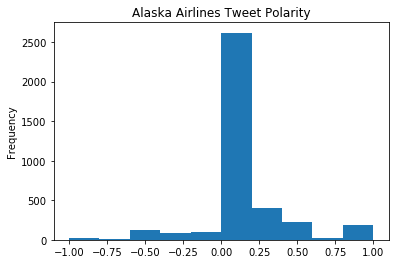

In [12]:
# Polarities
airline_tweets.head()

alaska_polarity = airline_tweets[airline_tweets['Airline']=='Alaska Airlines']
alaska_polarity_hist = alaska_polarity['polarity'].plot(kind='hist', bins=10, title='Alaska Airlines Tweet Polarity')

alaska_polarity_hist

names = ["Alaska Airlines", 
             "Delta Airlines", 
             "United Airlines", 
             "American Airlines", 
             "Southwest Airlines", 
             "JetBlue"
            ]

#def polarity_histograms():
#   for name in names:
#        f{name}_polarity_hist = airline_tweets[airline_tweets['Airline']==name]
#f{name}_polarity_hist['polarity'].plot(kind='hist', bins=10, title='f{name} Tweet Polarity')
        

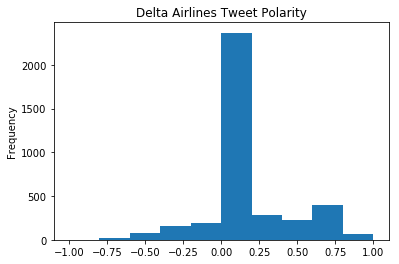

In [13]:
delta_polarity = airline_tweets[airline_tweets['Airline']=='Delta Airlines']
delta_polarity_hist = delta_polarity['polarity'].plot(kind='hist', 
                                     bins=10, 
                                     title='Delta Airlines Tweet Polarity')

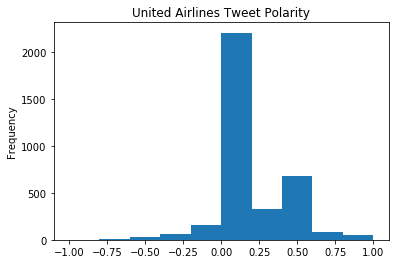

In [14]:
united_polarity = airline_tweets[airline_tweets['Airline']=='United Airlines']
united_polarity_hist = united_polarity['polarity'].plot(kind='hist', 
                                                        bins=10, 
                                                        title='United Airlines Tweet Polarity')

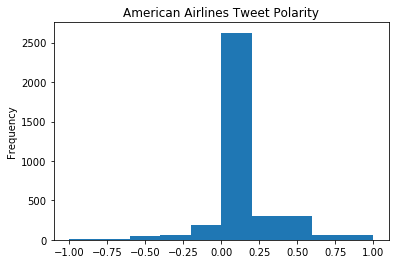

In [15]:
american_polarity = airline_tweets[airline_tweets['Airline']=='American Airlines']
american_polarity_hist = american_polarity['polarity'].plot(kind='hist', 
                                                            bins=10, 
                                                            title='American Airlines Tweet Polarity')

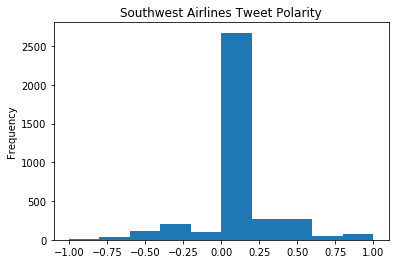

In [16]:
southwest_polarity = airline_tweets[airline_tweets['Airline']=='Southwest Airlines']
southwest_polarity_hist = southwest_polarity['polarity'].plot(kind='hist', 
                                                              bins=10, 
                                                              title='Southwest Airlines Tweet Polarity')

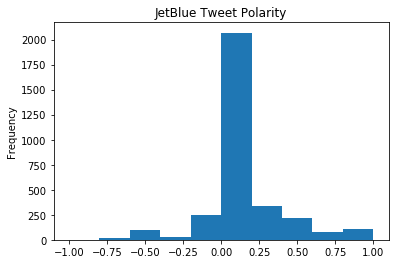

In [17]:
jetblue_polarity = airline_tweets[airline_tweets['Airline']=='JetBlue']
jetblue_polarity_hist = jetblue_polarity['polarity'].plot(kind='hist', 
                                                          bins=10, 
                                                          title='JetBlue Tweet Polarity')

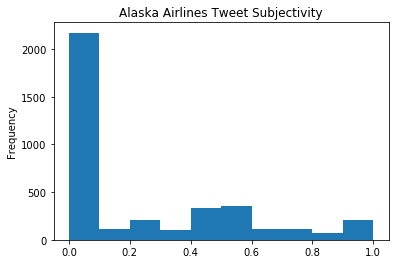

In [18]:
alaska_subjectivity = airline_tweets[airline_tweets['Airline']=='Alaska Airlines']
alaska_subjectivity_hist = alaska_subjectivity['subjectivity'].plot(kind='hist', 
                                                                  bins=10, 
                                                                  title='Alaska Airlines Tweet Subjectivity')

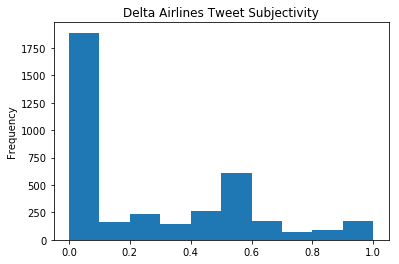

In [19]:
# Subjectivities

delta_subjectivity = airline_tweets[airline_tweets['Airline']=='Delta Airlines']
delta_subjectivity_hist = delta_subjectivity['subjectivity'].plot(kind='hist', 
                                                                  bins=10, 
                                                                  title='Delta Airlines Tweet Subjectivity')

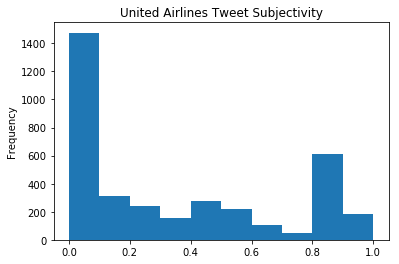

In [20]:
united_subjectivity = airline_tweets[airline_tweets['Airline']=='United Airlines']
united_subjectivity_hist = united_subjectivity['subjectivity'].plot(kind='hist', 
                                                                  bins=10, 
                                                                  title='United Airlines Tweet Subjectivity')

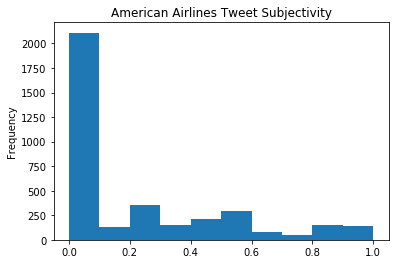

In [21]:
american_subjectivity = airline_tweets[airline_tweets['Airline']=='American Airlines']
american_subjectivity_hist = american_subjectivity['subjectivity'].plot(kind='hist', 
                                                                  bins=10, 
                                                                  title='American Airlines Tweet Subjectivity')

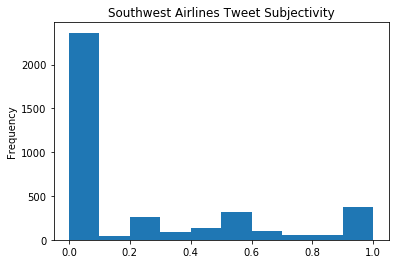

In [22]:
southwest_subjectivity = airline_tweets[airline_tweets['Airline']=='Southwest Airlines']
southwest_subjectivity_hist = southwest_subjectivity['subjectivity'].plot(kind='hist', 
                                                                  bins=10, 
                                                                  title='Southwest Airlines Tweet Subjectivity')

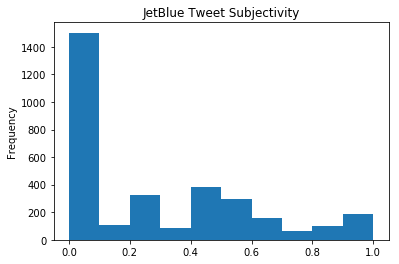

In [23]:
jetblue_subjectivity = airline_tweets[airline_tweets['Airline']=='JetBlue']
jetblue_subjectivity_hist = jetblue_subjectivity['subjectivity'].plot(kind='hist', 
                                                                  bins=10, 
                                                                  title='JetBlue Tweet Subjectivity')

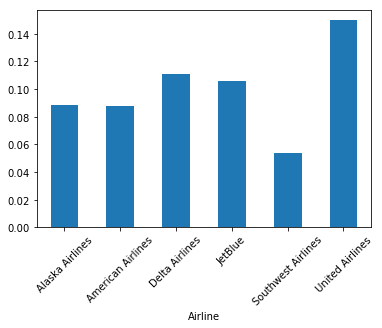

In [24]:
# Airline polarity

polarity = airline_tweets.groupby('Airline')['polarity'].mean()
polarity.plot('bar', rot=45)

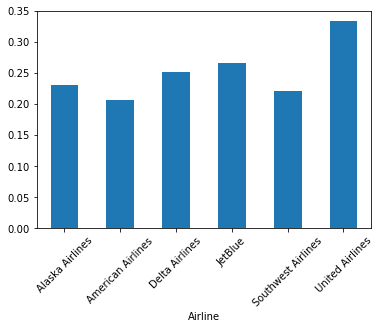

In [25]:
# Airline subjectivity

subjectivity = airline_tweets.groupby('Airline')['subjectivity'].mean()
subjectivity.plot('bar', rot=45)

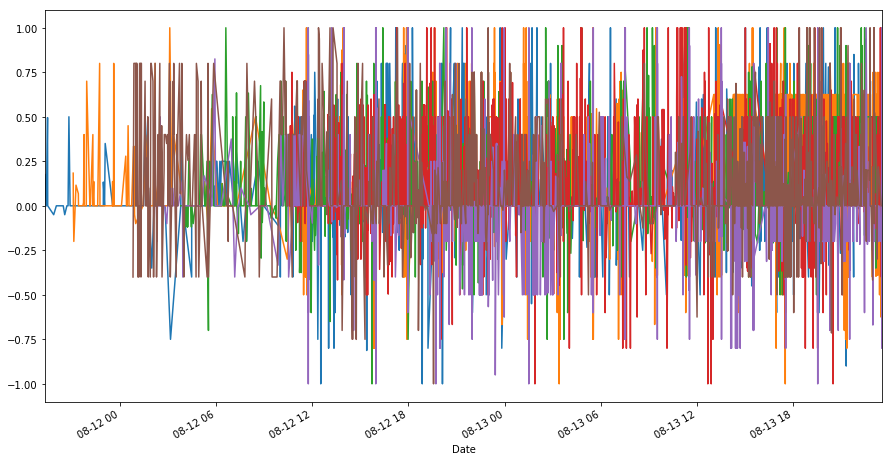

In [26]:
alaska_polarity['polarity'].plot(figsize=(15,8))
delta_polarity['polarity'].plot(figsize=(15,8))
united_polarity['polarity'].plot(figsize=(15,8))
american_polarity['polarity'].plot(figsize=(15,8))
southwest_polarity['polarity'].plot(figsize=(15,8))
jetblue_polarity['polarity'].plot(figsize=(15,8))

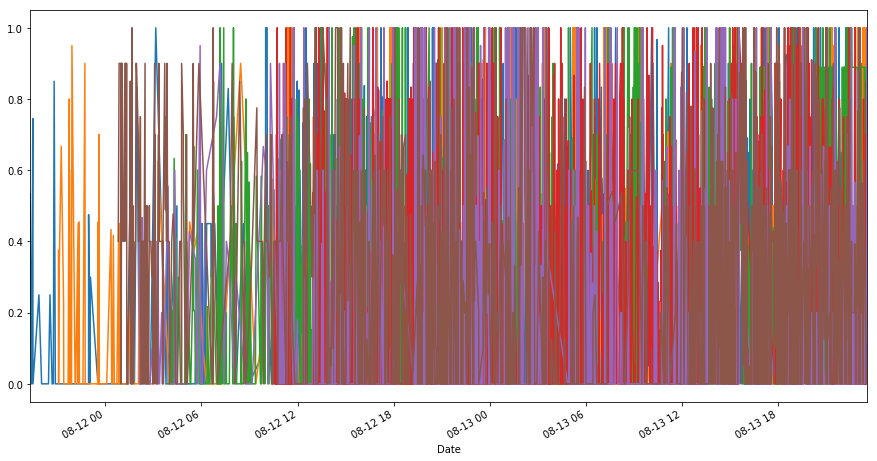

In [27]:
alaska_subjectivity['subjectivity'].plot(figsize=(15,8))
delta_subjectivity['subjectivity'].plot(figsize=(15,8))
united_subjectivity['subjectivity'].plot(figsize=(15,8))
american_subjectivity['subjectivity'].plot(figsize=(15,8))
southwest_subjectivity['subjectivity'].plot(figsize=(15,8))
jetblue_subjectivity['subjectivity'].plot(figsize=(15,8))

In [46]:
polar1 = united_polarity[united_polarity['polarity']==-1]


polar1.to_csv('united_negative.csv')

In [50]:
polar_positive = jetblue_polarity[jetblue_polarity['polarity']==1]
polar_positive.to_csv('jetblue_positive.csv')

In [53]:
subjectivity_ua_one = united_subjectivity[united_subjectivity['subjectivity']==1]
subjectivity_ua_one.to_csv('united_subjective.csv')

In [58]:
subjectivity_alaska_zero = alaska_subjectivity[alaska_subjectivity['subjectivity']==0]
subjectivity_alaska_zero
subjectivity_alaska_zero.to_csv('alaska_subjective2.csv')

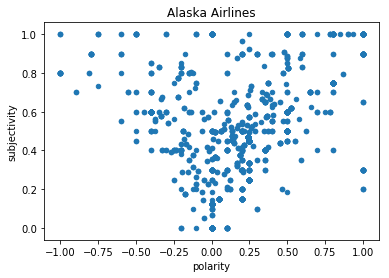

In [68]:
alaska_polarity.plot(kind="scatter", 
                     x='polarity', 
                     y='subjectivity',
                     title='Alaska Airlines')

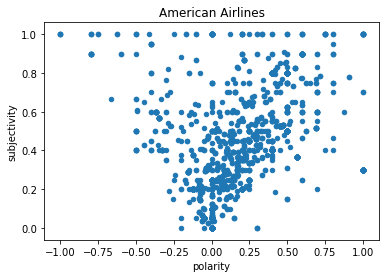

In [66]:
american_polarity.plot(kind="scatter", 
                       x='polarity', 
                       y='subjectivity', 
                       title='American Airlines')

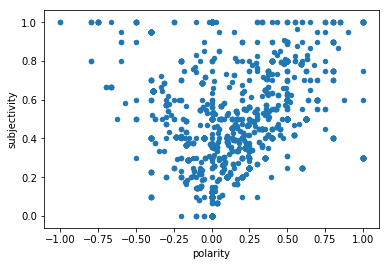

In [65]:
delta_polarity.plot(kind="scatter", 
                    x='polarity', 
                    y='subjectivity',
                    title='Delta Airlines')

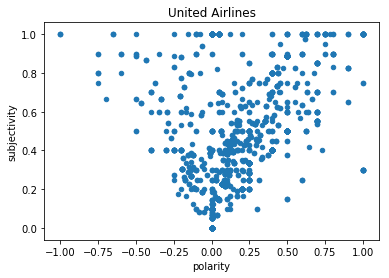

In [67]:
united_polarity.plot(kind="scatter", 
                    x='polarity', 
                    y='subjectivity',
                    title='United Airlines')

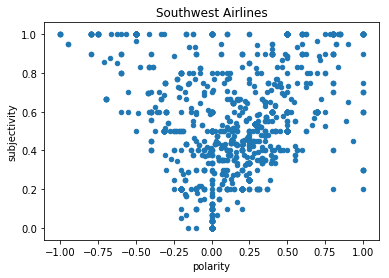

In [69]:
southwest_polarity.plot(kind="scatter", 
                    x='polarity', 
                    y='subjectivity',
                    title='Southwest Airlines')

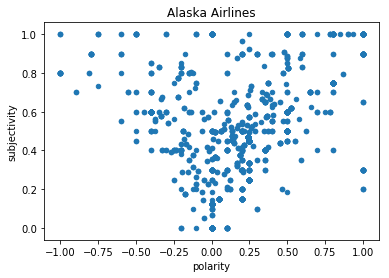

In [70]:
alaska_polarity.plot(kind="scatter", 
                    x='polarity', 
                    y='subjectivity',
                    title='Alaska Airlines')